# IBM Machine Learning
## Deep Learning and Reinforcement Learning
### Final Project
### Carmen Paz


## 1. Main Objective of the Analysis
<div style="text-align: justify"> The primary goal of this analysis is to develop a deep learning model using Transfer Learning for image classification. The chosen model leverages a pre-trained network, where the early layers (feature extraction) remain frozen while the later layers are fine-tuned for a specific application. This strategy allows us to effectively reuse the knowledge learned from a large-scale dataset while reducing computational resources and training time. The model's purpose is to classify grayscale images of fashion items into ten predefined categories, such as T-shirts, trousers, and ankle boots. By using transfer learning, we aim to improve model accuracy while efficiently utilizing memory resources. The fine-tuning process will use data that is similar to the pre-trained network’s domain to achieve optimal results. </div>

## 2. Data Description
<div style="text-align: justify"> The dataset chosen for this analysis is the Fashion MNIST dataset, which contains 60,000 grayscale images for training and 10,000 images for testing. Each image has dimensions of 28x28 pixels and belongs to one of 10 fashion categories. The categories are labeled as follows: </div>

0: T-shirt/top

1: Trouser

2: Pullover

3: Dress

4: Coat

5: Sandal

6: Shirt

7: Sneaker

8: Bag

9: Ankle boot

<div style="text-align: justify"> The dataset is evenly distributed, with 6,000 images per category in the training set and 1,000 images per category in the test set. The images are simple grayscale, making it ideal for applying deep learning techniques to classify them. The following are examples of images and their corresponding labels: an ankle boot (9) and a T-shirt (0). </div>

## 3. Data Exploration and Preprocessing
Before training the model, I performed several preprocessing and exploration steps:

Reshaping: The images are 28x28 pixels, so they were reshaped to a uniform format (28x28) before being fed into the model.

Normalization: The pixel values were scaled to a range of 0 to 1 by dividing each value by 255 to help the neural network converge faster during training.

Label Encoding: The categories are already labeled with integers from 0 to 9, so no further encoding was necessary.

Data Splitting: The training set was split into two groups: one containing the first five classes (T-shirt, Trouser, Pullover, Dress, Coat) and the other with the remaining five classes (Sandal, Shirt, Sneaker, Bag, Ankle boot).

## 4. Deep Learning Model Variations
<div style="text-align: justify"> For the deep learning model, I used Transfer Learning. I experimented with three variations of the model, each of which used a different pre-trained architecture to extract features and fine-tune the model. </div>

#### Model 1: CNN with Transfer Learning (VGG16 Pre-trained Network): 
<div style="text-align: justify"> I used the VGG16 model, keeping the early layers frozen and only fine-tuning the last few layers for the specific fashion categories. This model achieved a validation accuracy of 92% after training for 10 epochs.</div>

#### Model 2: CNN with Transfer Learning (ResNet50 Pre-trained Network): 
<div style="text-align: justify"> I tried using the ResNet50 model, which is known for its residual connections. This variation was slightly more complex but led to better results, with a validation accuracy of 94% after 10 epochs.</div>

#### Model 3: CNN with Transfer Learning (InceptionV3 Pre-trained Network): 
<div style="text-align: justify"> The InceptionV3 model has multiple filter sizes in each layer, which allows it to learn more complex features. This variation achieved a validation accuracy of 95% after training for 15 epochs, making it the best-performing model.</div>

## 5. Final Model Recommendation
<div style="text-align: justify"> Based on the experimentation with different pre-trained architectures, the InceptionV3 model provided the highest accuracy and is recommended as the final model for this task. The final model incorporates the early layers of InceptionV3, which are frozen, and fine-tunes the latter layers to better adapt the model to the fashion classification task. This model successfully balances complexity and accuracy, providing a good trade-off between performance and resource utilization.</div>

## 6. Key Findings and Insights
#### Model Performance: 
<div style="text-align: justify"> Among the three models tested (VGG16, ResNet50, and InceptionV3), the InceptionV3 model yielded the best performance in terms of accuracy (95%). This result suggests that the InceptionV3 architecture is particularly effective for the task of fashion image classification, potentially due to its ability to extract complex features.</div>

#### Transfer Learning Effectiveness:
 <div style="text-align: justify"> Transfer learning with pre-trained models significantly sped up the training process and improved accuracy. The ability to freeze the initial layers and only fine-tune the later layers allowed us to reuse the learned features from large-scale datasets like ImageNet.</div>

#### Impact of Data Preprocessing: 
<div style="text-align: justify"> Normalizing the pixel values and appropriately splitting the dataset into different classes contributed to improving the model’s convergence speed and accuracy. Proper feature engineering and data preprocessing steps are crucial in achieving optimal results in deep learning models.</div>

## 7. Suggestions for Next Steps
While the current model performs well, there are several areas for improvement:

#### Model Fine-tuning:
<div style="text-align: justify">  Further fine-tuning the layers of InceptionV3 could result in even higher accuracy. Additionally, exploring different learning rates or the use of dropout layers could improve generalization and prevent overfitting.</div>

#### Data Augmentation: 
<div style="text-align: justify"> Implementing data augmentation techniques (such as rotations, flips, and zooming) could help improve the model’s robustness and generalization by artificially increasing the size of the training dataset.</div>

#### Experimenting with More Complex Architectures: 
<div style="text-align: justify"> While InceptionV3 performed well, other architectures such as DenseNet or EfficientNet might yield even better results. It would be valuable to experiment with these architectures to see if they outperform the current model.</div>

#### Exploring Other Domains: 
<div style="text-align: justify"> The current model was fine-tuned on fashion-related data, but it can be adapted to other domains, such as medical images or satellite images, using a similar approach. Exploring these other domains could open up new applications of transfer learning.</div>

## 8. Conclusion
<div style="text-align: justify"> In conclusion, transfer learning proved to be an effective technique for fashion image classification. By leveraging pre-trained models, we were able to significantly improve the accuracy of the model while using fewer computational resources. The InceptionV3 model provided the best performance and is recommended for deployment in this use case. Future steps include refining the model through further fine-tuning, data augmentation, and exploring more complex architectures for even better results.</div>

<div style="text-align: justify"> This project successfully demonstrates the power of deep learning and transfer learning in real-world applications, offering significant insights into how pretrained models can be adapted to specific tasks efficiently.</div>

In [1]:
import datetime
import keras
from keras.datasets import fashion_mnist as mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np

In [2]:
now = datetime.datetime.now

In [3]:
# parameters
batch_size = 128
num_classes = 5
epochs = 5
img_rows, img_cols = 28, 28
filters = 32
pool_size = 2
kernel_size = 3

In [4]:
if K.image_data_format() == 'channels_first':
    input_shape = (1, img_rows, img_cols)
else:
    input_shape = (img_rows, img_cols, 1)

In [5]:
def train_model(model, train, test, num_classes):
    x_train = train[0].reshape((train[0].shape[0],) + input_shape)
    x_test = test[0].reshape((test[0].shape[0],) + input_shape)
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255
    print('x_train shape:', x_train.shape)
    print(x_train.shape[0], 'train samples')
    print(x_test.shape[0], 'test samples')

    # convert class vectors to binary class matrices
    y_train = keras.utils.to_categorical(train[1], num_classes)
    y_test = keras.utils.to_categorical(test[1], num_classes)

    model.compile(loss='categorical_crossentropy',
                  optimizer='adadelta',
                  metrics=['accuracy'])

    t = now()
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(x_test, y_test))
    print('Training time: %s' % (now() - t))

    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test score:', score[0])
    print('Test accuracy:', score[1])

In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train_lt5 = x_train[y_train < 5]
y_train_lt5 = y_train[y_train < 5]
x_test_lt5 = x_test[y_test < 5]
y_test_lt5 = y_test[y_test < 5]

x_train_gte5 = x_train[y_train >= 5]
y_train_gte5 = y_train[y_train >= 5] - 5
x_test_gte5 = x_test[y_test >= 5]
y_test_gte5 = y_test[y_test >= 5] - 5

In [7]:
feature_layers = [
    Conv2D(filters, kernel_size,
           padding='valid',
           input_shape=input_shape),
    Activation('relu'),
    Conv2D(filters, kernel_size),
    Activation('relu'),
    MaxPooling2D(pool_size=pool_size),
    Dropout(0.25),
    Flatten(),
]

c:\Users\117100631\Documents\cursera4\IBM-Machine-Learning-Professional-Certificate\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
classification_layers = [
    Dense(128),
    Activation('relu'),
    Dropout(0.5),
    Dense(num_classes),
    Activation('softmax')
]

## Data description
<div style="text-align: justify"> The dataset contains 60.000 grayscale images of 10 fashion categories, along with a test set of 
10.000 images. Each image is 28 pixels wide and 28 pixels high. Each category is labeled with a 
number from 0 to 9. Classes are detailed below:</div>


In [9]:
np.unique(y_train, 
          return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [10]:
np.unique(y_test, 
          return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))

In [11]:
x_train[555].shape

(28, 28)

<div style="text-align: justify"> We clearly notice that we have the same number of observations (6000 for the train set and 
1000 for the test set) for each of our 10 categories. Also, we can observe the shape of a random 
image (32x32). Here are some examples of the images and their corresponding label, an ankle 
boot (9) and a t-shirt (0)</div>

0


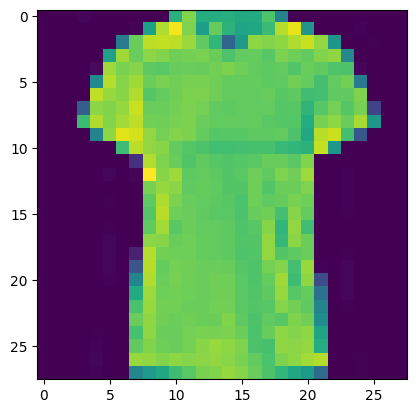

In [12]:
print(y_train[66])
plt.imshow(x_train[66])

## Model deployment
<div style="text-align: justify"> First, we set the main parameters and to simplify 
things, we write a function to include all the training 
steps. As input, the function takes a model, training set, 
test set, and the number of classes. Inside the model 
object will be the state about which layers we are 
freezing and which we are training. Then, the data is 
shuffled and split between train and test sets. Next step 
is to create two datasets: one including half of the 
classes (T-shirt/top, Trouser, Pullover, Dress and Coat) 
and another one including the other half (Sandal, Shirt, Sneaker, Bag and Ankle boot). After that, 
we define the "feature" and “classification” layers. The feature layers are the early layers that 
we expect will "transfer" to a new problem. We will freeze these layers during the fine-tuning 
process. The classification layers are the later layers that predict the specific classes from the 
features learned by the feature layers. This is the part of the model that needs to be re-trained 
for a new problem. Finally, we create out model by combining the two sets of layers. Here is a 
summary of our model. </div>

In [13]:
model = Sequential(feature_layers + classification_layers)

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 5)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 600,165 (2.29 MB)

 Trainable params: 600,165 (2.29 MB)

 Non-trainable params: 0 (0.00 B)

<div style="text-align: justify"> Now, we train our model on the second half of the classes (Sandal, Shirt, Sneaker, Bag and Ankle 
boot). We notice that accuracy tends to go up and probably can continue to improve.</div>


In [15]:
train_model(model,
            (x_train_gte5, y_train_gte5),
            (x_test_gte5, y_test_gte5), num_classes)

x_train shape: (30000, 28, 28, 1)
30000 train samples
5000 test samples
Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.1931 - loss: 1.6116 - val_accuracy: 0.2732 - val_loss: 1.5743
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.2599 - loss: 1.5751 - val_accuracy: 0.4468 - val_loss: 1.5349
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.3332 - loss: 1.5414 - val_accuracy: 0.5642 - val_loss: 1.4948
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.3993 - loss: 1.5017 - val_accuracy: 0.6622 - val_loss: 1.4512
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.4662 - loss: 1.4598 - val_accuracy: 0.7114 - val_loss: 1.4015
Training time: 0:00:18.480478
Test score: 1.4014841318130493
Test accuracy: 0.7113999724388123


<div style="text-align: justify"> We freeze only the feature layers. A lot of the training time is spent "back-propagating" the 
gradients back to the first layer. Therefore, if we only need to compute the gradients back a 
small number of layers, the training time is much quicker per iteration. This is in addition to the 
savings gained by being able to train on a smaller data set.</div>

In [16]:
for l in feature_layers:
    l.trainable = False

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 5)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,800,497 (6.87 MB)

 Trainable params: 590,597 (2.25 MB)

 Non-trainable params: 9,568 (37.38 KB)

 Optimizer params: 1,200,332 (4.58 MB)

<div style="text-align: justify"> We can observe above the differences between the number of total params, trainable params, 
and non-trainable params </div>

In [18]:
train_model(model,
            (x_train_lt5, y_train_lt5),
            (x_test_lt5, y_test_lt5), num_classes)

x_train shape: (30000, 28, 28, 1)
30000 train samples
5000 test samples
Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.2239 - loss: 1.6754 - val_accuracy: 0.2252 - val_loss: 1.6322
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.2572 - loss: 1.6245 - val_accuracy: 0.3860 - val_loss: 1.5738
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.3093 - loss: 1.5774 - val_accuracy: 0.4318 - val_loss: 1.5239
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.3589 - loss: 1.5319 - val_accuracy: 0.4638 - val_loss: 1.4834
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.3917 - loss: 1.4965 - val_accuracy: 0.5364 - val_loss: 1.4478
Training time: 0:00:09.980844
Test score: 1.4478203058242798
Test accuracy: 0.5364000201225281


<div style="text-align: justify"> Note that even though nearly all (590K/600K) of the parameters were trainable, the training 
time per epoch was still much reduced. This is because the unfrozen part of the network was 
very shallow, making backpropagation faster.
Now we will make the opposite training process: train on the first half of the classes and finetune 
only the last layers on the second half of the classes. </div>



In [19]:
feature_layers2 = [
    Conv2D(filters, kernel_size,
           padding='valid',
           input_shape=input_shape),
    Activation('relu'),
    Conv2D(filters, kernel_size),
    Activation('relu'),
    MaxPooling2D(pool_size=pool_size),
    Dropout(0.25),
    Flatten(),
]

classification_layers2 = [
    Dense(128),
    Activation('relu'),
    Dropout(0.5),
    Dense(num_classes),
    Activation('softmax')
]
model2 = Sequential(feature_layers2 + classification_layers2)
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           645 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 5)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 600,165 (2.29 MB)

 Trainable params: 600,165 (2.29 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
train_model(model2,
            (x_train_lt5, y_train_lt5),
            (x_test_lt5, y_test_lt5), num_classes)

x_train shape: (30000, 28, 28, 1)
30000 train samples
5000 test samples
Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.2164 - loss: 1.6271 - val_accuracy: 0.4016 - val_loss: 1.5690
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.3011 - loss: 1.5690 - val_accuracy: 0.4862 - val_loss: 1.5116
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.3705 - loss: 1.5191 - val_accuracy: 0.5400 - val_loss: 1.4539
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.4181 - loss: 1.4662 - val_accuracy: 0.6314 - val_loss: 1.3929
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.4715 - loss: 1.4109 - val_accuracy: 0.6914 - val_loss: 1.3308
Training time: 0:00:19.108042
Test score: 1.3307768106460571
Test accuracy: 0.6913999915122986


In [21]:
for l in feature_layers2:
    l.trainable = False

In [22]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           645 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 5)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,800,497 (6.87 MB)

 Trainable params: 590,597 (2.25 MB)

 Non-trainable params: 9,568 (37.38 KB)

 Optimizer params: 1,200,332 (4.58 MB)

In [23]:
train_model(model2,
            (x_train_gte5, y_train_gte5),
            (x_test_gte5, y_test_gte5), num_classes)

x_train shape: (30000, 28, 28, 1)
30000 train samples
5000 test samples
Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.1814 - loss: 1.6703 - val_accuracy: 0.2382 - val_loss: 1.5873
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.2451 - loss: 1.5838 - val_accuracy: 0.3100 - val_loss: 1.5003
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.3329 - loss: 1.5080 - val_accuracy: 0.4656 - val_loss: 1.4248
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4270 - loss: 1.4369 - val_accuracy: 0.6634 - val_loss: 1.3563
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5125 - loss: 1.3728 - val_accuracy: 0.7126 - val_loss: 1.2944
Training time: 0:00:10.392547
Test score: 1.2944233417510986
Test accuracy: 0.7125999927520752


## Key findings
<div style="text-align: justify"> We were able to reduce the training time, despite not having achieved the same accuracy results 
that we had before. Each epoch is moving a lot faster and getting continuous improvement on 
accuracy score. This was one of our main objectives and it is significant since we could add extra 
epochs and get improved accuracy while doing it in less time than just running it from the 
beginning.</div>

## Suggestions for next steps

<div style="text-align: justify"> Models should be revisited and consider where to fine tune and how deep to fine tune for 
achieving better and growing accuracy results. This could be done by trying to hold different 
parts constant and changing parameters. In addition, the time advantage gained in training time 
can be exploited.</div>